# Spark Learning Note - Data Source

Jia Geng | gjia0214@gmail.com


## Data Source

Spark has six core data sources
- csv
    - does NOT support complex type
    - unless ecoded in some way and implement some customized reading
    - lots of options (check appendix)
- json
    - line delimited json / multiline
    - line delimited is more stable and easier to work with (structured)
    - check appendix for options
- parquet
    - column-oriented data store
    - columnar compression, save storage space and allow for reading individual column
    - the default format for apache spark (works very efficiently with spark)
    - support complex type
    - less options for reading, schema is build into file itself
    - `spark.read.format('parquet').load(path/to/file)`
    - support write in paritions `df.write.partitionBy(feature).save(path)`
        - the parquet file will contains list of 'folders'
        - such partition will support parallel writing and reading
- orc
    - self-describing, type-aware columnar file format
    - designed for Hadoop workloads (Optimized for Hive)
    - optimized for stream reading
    - no option for read `spark.read.format('orc').load(path/to/file)`
- jdbc/odbc connections
    - make connection to the SQL database 
- plain text files
    - `spark.read.textFile(path)`

There are also hundreds of community created data sources such as:
- Cassandra
- HBase
- MongoDB
- AWS Redshift
- XML
- ...

## Basic Read

```
df = spark.read.format(file_format).option('key', 'val').schema(someSchema).load()
```

**`spark.read` will return a DataFrameWriter object.**

Option - Read Mode (pass in via `.option('mode', 'xxx')`) for dealing with malformed data. Default is `permissive`
- `permissive`: set all fields to null when there is a corrupted record and place all corrupted records in a string column called `_corrupt_record`
- `dropMalformed`: drop the row with malformed data
- `failFase`: fails when encountering malformed data

Some other options:
- `('header', True)` treat first line is header
- `('inderSchema', True)` make inference on the schema

## Baisc Write

```
df.write.format(file_format).option().save()
```

**`df.write` will return a DataFrameWriter object**

Write Mode Option (default is `errorIfExist`)
- `append`: append the output files to the list of files that already exist
- `overwrite`: overwrite the file if exist
- `errorIfExist`: raise error if file exist
- `ignore`: do nothing if file exist

Some other options
- `('dateFormat', 'yyyy-MM-dd')`

## Format Specific Options

There are other options available for different input/output formats.
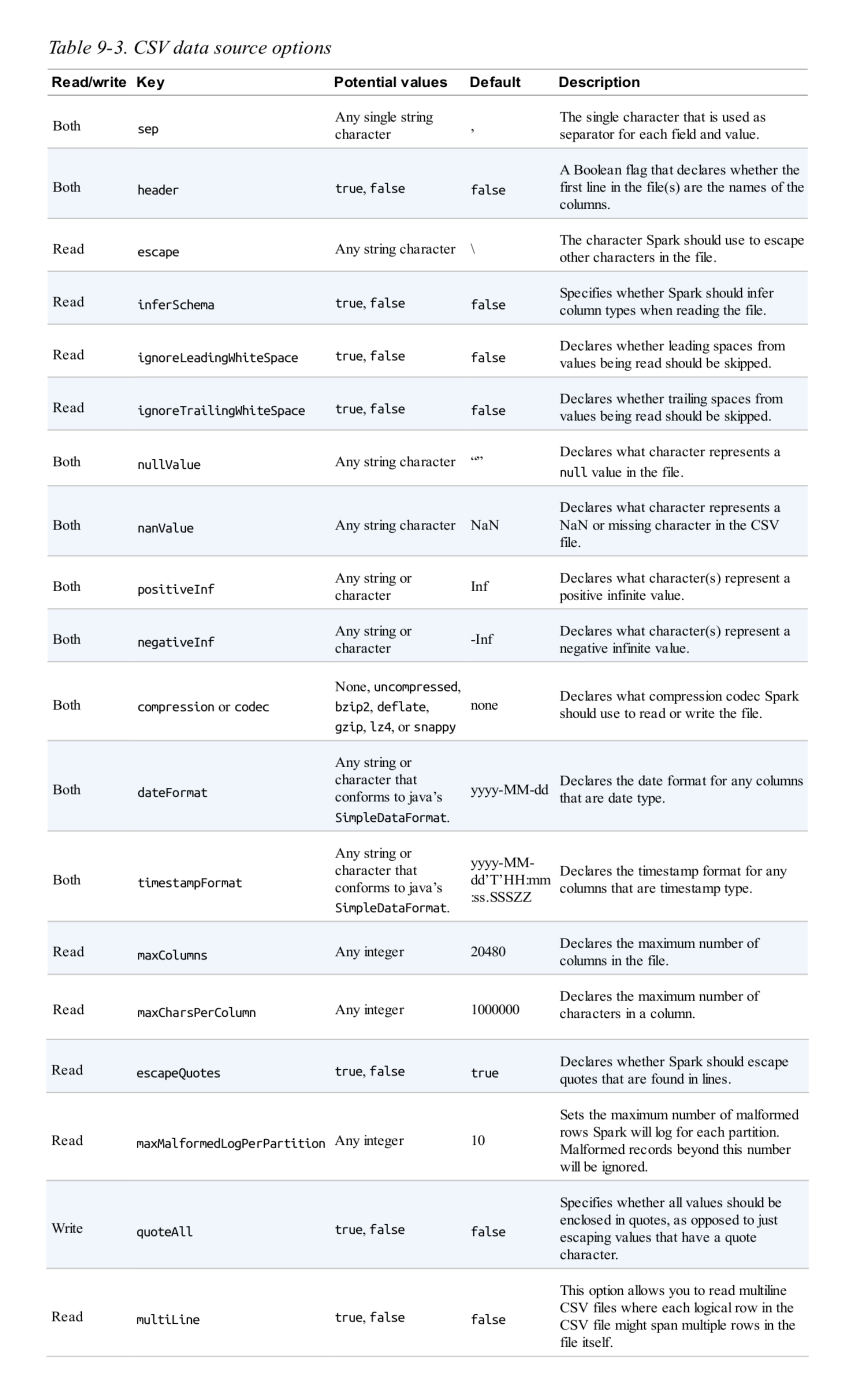
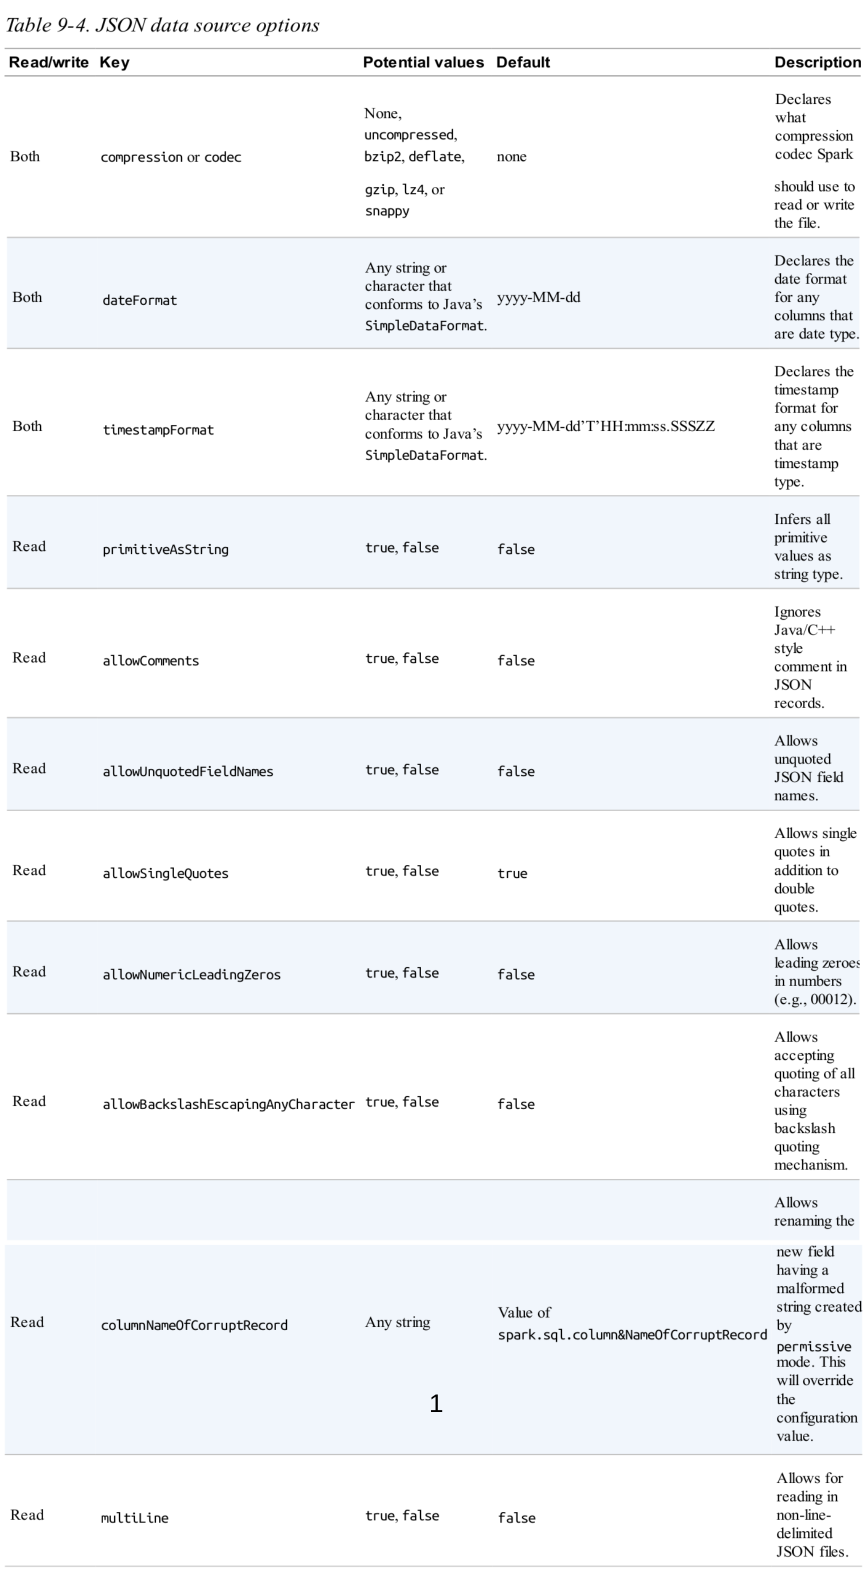